In [1]:
%matplotlib inline 
# This turns on inline plotting, where plot graphics will appear in notebook.

In [2]:
from util.devices import find_device
from data_action.transformations import *
from data_action.data_loader import *
from util.image_plot import plot_images
from model.resnet import ResNet18
from learning.train import train
from learning.validate import test
from util.graph_plot import plot_me

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [3]:
device = find_device()
batch_size = 100

data_loader = Data_Loader(device, batch_size)

trainloader = data_loader.load_training_data()
testloader = data_loader.load_testing_data()

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device: cuda

Loading training data. Dataset: CIFAR10
Files already downloaded and verified
Training data loaded

Loading testing data.
Files already downloaded and verified
Test data loaded



Let us show some of the training images, for fun.



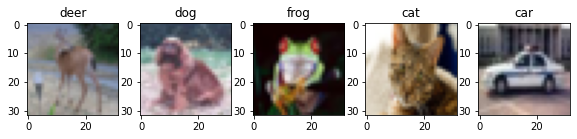

In [4]:

# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images and their labels
plot_images(dataiter, classes, total=5)


2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [5]:
net = ResNet18(0.1).to(device)

In [6]:
!pip install torchsummary
from torchsummary import summary

summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1, 64,

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 1


loss=1.6035513877868652 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.06it/s]


\Train set: Accuracy: 12251/50000 (24.5020%)



loss=1.720039963722229 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.15it/s]


Test set: Average loss: 1.6819, Accuracy: 3712/10000 (37.12%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 2


loss=1.354688286781311 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.09it/s]


\Train set: Accuracy: 21908/50000 (43.8160%)



loss=1.3401178121566772 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.09it/s]


Test set: Average loss: 1.3624, Accuracy: 4963/10000 (49.63%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 3


loss=1.0634418725967407 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.09it/s]


\Train set: Accuracy: 27055/50000 (54.1100%)



loss=1.095934271812439 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.12it/s]


Test set: Average loss: 1.2100, Accuracy: 5720/10000 (57.20%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 4


loss=0.9540006518363953 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.08it/s]


\Train set: Accuracy: 31139/50000 (62.2780%)



loss=0.8606784343719482 batch_id=0:   0%|          | 1/500 [00:00<01:24,  5.89it/s]


Test set: Average loss: 1.0216, Accuracy: 6441/10000 (64.41%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 5


loss=0.8431124687194824 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.09it/s]


\Train set: Accuracy: 33887/50000 (67.7740%)



loss=0.6837526559829712 batch_id=0:   0%|          | 1/500 [00:00<01:22,  6.03it/s]


Test set: Average loss: 0.9337, Accuracy: 6827/10000 (68.27%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 6


loss=0.7625332474708557 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.07it/s]


\Train set: Accuracy: 36452/50000 (72.9040%)



loss=0.5037822723388672 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.09it/s]


Test set: Average loss: 0.7489, Accuracy: 7438/10000 (74.38%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 7


loss=0.7710120677947998 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.07it/s]


\Train set: Accuracy: 38422/50000 (76.8440%)



loss=0.5913457274436951 batch_id=0:   0%|          | 1/500 [00:00<01:20,  6.16it/s]


Test set: Average loss: 0.6536, Accuracy: 7740/10000 (77.40%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 8


loss=0.580681324005127 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.08it/s]


\Train set: Accuracy: 39869/50000 (79.7380%)



loss=0.44383925199508667 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.12it/s]


Test set: Average loss: 0.5854, Accuracy: 8048/10000 (80.48%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 9


loss=0.38281893730163574 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.08it/s]


\Train set: Accuracy: 42424/50000 (84.8480%)



loss=0.3900832235813141 batch_id=0:   0%|          | 1/500 [00:00<01:22,  6.02it/s]


Test set: Average loss: 0.5209, Accuracy: 8326/10000 (83.26%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 10


loss=0.410064160823822 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.07it/s]


\Train set: Accuracy: 43215/50000 (86.4300%)



loss=0.40035974979400635 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.13it/s]


Test set: Average loss: 0.5057, Accuracy: 8338/10000 (83.38%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 11


loss=0.5997620224952698 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.07it/s]


\Train set: Accuracy: 43908/50000 (87.8160%)



loss=0.25358134508132935 batch_id=0:   0%|          | 1/500 [00:00<01:19,  6.25it/s]


Test set: Average loss: 0.5108, Accuracy: 8352/10000 (83.52%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 12


loss=0.3759783208370209 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.08it/s]


\Train set: Accuracy: 44514/50000 (89.0280%)



loss=0.27356237173080444 batch_id=0:   0%|          | 1/500 [00:00<01:22,  6.02it/s]


Test set: Average loss: 0.5220, Accuracy: 8324/10000 (83.24%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 13


loss=0.2767238914966583 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.06it/s]


\Train set: Accuracy: 45212/50000 (90.4240%)



loss=0.2373693436384201 batch_id=0:   0%|          | 1/500 [00:00<01:22,  6.07it/s]


Test set: Average loss: 0.5294, Accuracy: 8329/10000 (83.29%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 14


loss=0.23600450158119202 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.06it/s]


\Train set: Accuracy: 45593/50000 (91.1860%)



loss=0.1767224818468094 batch_id=0:   0%|          | 1/500 [00:00<01:23,  5.98it/s]


Test set: Average loss: 0.5254, Accuracy: 8432/10000 (84.32%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 15


loss=0.17891082167625427 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.06it/s]


\Train set: Accuracy: 46133/50000 (92.2660%)



loss=0.1347835212945938 batch_id=0:   0%|          | 1/500 [00:00<01:22,  6.07it/s]


Test set: Average loss: 0.5547, Accuracy: 8371/10000 (83.71%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 16


loss=0.24460743367671967 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.05it/s]


\Train set: Accuracy: 46491/50000 (92.9820%)



loss=0.14859098196029663 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.14it/s]


Test set: Average loss: 0.5706, Accuracy: 8369/10000 (83.69%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 17


loss=0.12758253514766693 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.09it/s]


\Train set: Accuracy: 47902/50000 (95.8040%)



loss=0.07815616577863693 batch_id=0:   0%|          | 1/500 [00:00<01:20,  6.23it/s]


Test set: Average loss: 0.5693, Accuracy: 8540/10000 (85.40%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 18


loss=0.11126997321844101 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.07it/s]


\Train set: Accuracy: 48382/50000 (96.7640%)



loss=0.06871797144412994 batch_id=0:   0%|          | 1/500 [00:00<01:22,  6.02it/s]


Test set: Average loss: 0.5620, Accuracy: 8596/10000 (85.96%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 19


loss=0.05279570445418358 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.07it/s]


\Train set: Accuracy: 48551/50000 (97.1020%)



loss=0.08900090306997299 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.10it/s]


Test set: Average loss: 0.5462, Accuracy: 8685/10000 (86.85%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 20


loss=0.10561751574277878 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.07it/s]


\Train set: Accuracy: 48657/50000 (97.3140%)



loss=0.056715596467256546 batch_id=0:   0%|          | 1/500 [00:00<01:22,  6.07it/s]


Test set: Average loss: 0.5794, Accuracy: 8610/10000 (86.10%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 21


loss=0.07774748653173447 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.07it/s]


\Train set: Accuracy: 48806/50000 (97.6120%)



loss=0.017660414800047874 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.12it/s]


Test set: Average loss: 0.5992, Accuracy: 8585/10000 (85.85%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 22


loss=0.10586812347173691 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.06it/s]


\Train set: Accuracy: 48863/50000 (97.7260%)



loss=0.07047155499458313 batch_id=0:   0%|          | 1/500 [00:00<01:22,  6.02it/s]


Test set: Average loss: 0.6079, Accuracy: 8619/10000 (86.19%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 23


loss=0.0764869898557663 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.05it/s]


\Train set: Accuracy: 48935/50000 (97.8700%)



loss=0.044384781271219254 batch_id=0:   0%|          | 1/500 [00:00<01:22,  6.05it/s]


Test set: Average loss: 0.6248, Accuracy: 8610/10000 (86.10%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 24


loss=0.032189786434173584 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.06it/s]


\Train set: Accuracy: 49032/50000 (98.0640%)



loss=0.06807725131511688 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.13it/s]


Test set: Average loss: 0.6220, Accuracy: 8642/10000 (86.42%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 25


loss=0.038314297795295715 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.06it/s]


\Train set: Accuracy: 49372/50000 (98.7440%)



loss=0.011366361752152443 batch_id=0:   0%|          | 1/500 [00:00<01:23,  5.97it/s]


Test set: Average loss: 0.6151, Accuracy: 8690/10000 (86.90%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 26


loss=0.07202964276075363 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.04it/s]


\Train set: Accuracy: 49436/50000 (98.8720%)



loss=0.07261015474796295 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.10it/s]


Test set: Average loss: 0.6133, Accuracy: 8729/10000 (87.29%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 27


loss=0.11432457715272903 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.07it/s]


\Train set: Accuracy: 49533/50000 (99.0660%)



loss=0.012655956670641899 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.16it/s]


Test set: Average loss: 0.6308, Accuracy: 8740/10000 (87.40%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 28


loss=0.021492665633559227 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.07it/s]


\Train set: Accuracy: 49560/50000 (99.1200%)



loss=0.020763739943504333 batch_id=0:   0%|          | 1/500 [00:00<01:25,  5.83it/s]


Test set: Average loss: 0.6460, Accuracy: 8717/10000 (87.17%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 29


loss=0.01776786334812641 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.06it/s]


\Train set: Accuracy: 49587/50000 (99.1740%)



loss=0.029158882796764374 batch_id=0:   0%|          | 1/500 [00:00<01:22,  6.08it/s]


Test set: Average loss: 0.6510, Accuracy: 8738/10000 (87.38%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 30


loss=0.007219457067549229 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.07it/s]


\Train set: Accuracy: 49617/50000 (99.2340%)



loss=0.017129184678196907 batch_id=0:   0%|          | 1/500 [00:00<01:23,  5.95it/s]


Test set: Average loss: 0.6706, Accuracy: 8709/10000 (87.09%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 31


loss=0.08405761420726776 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.05it/s]


\Train set: Accuracy: 49645/50000 (99.2900%)



loss=0.003273585345596075 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.16it/s]


Test set: Average loss: 0.6742, Accuracy: 8735/10000 (87.35%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 32


loss=0.022243667393922806 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.05it/s]


\Train set: Accuracy: 49587/50000 (99.1740%)



loss=0.002931167371571064 batch_id=0:   0%|          | 1/500 [00:00<01:25,  5.84it/s]


Test set: Average loss: 0.6579, Accuracy: 8746/10000 (87.46%)

Adjusting learning rate of group 0 to 1.2500e-02.
Epoch: 33


loss=0.0165009256452322 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.06it/s]


\Train set: Accuracy: 49704/50000 (99.4080%)



loss=0.017720624804496765 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.15it/s]


Test set: Average loss: 0.6632, Accuracy: 8747/10000 (87.47%)

Adjusting learning rate of group 0 to 1.2500e-02.
Epoch: 34


loss=0.05086803063750267 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.05it/s]


\Train set: Accuracy: 49757/50000 (99.5140%)



loss=0.005613991990685463 batch_id=0:   0%|          | 1/500 [00:00<01:22,  6.06it/s]


Test set: Average loss: 0.6754, Accuracy: 8765/10000 (87.65%)

Adjusting learning rate of group 0 to 1.2500e-02.
Epoch: 35


loss=0.00801197811961174 batch_id=499: 100%|██████████| 500/500 [01:22<00:00,  6.06it/s]


\Train set: Accuracy: 49775/50000 (99.5500%)


Test set: Average loss: 0.6717, Accuracy: 8756/10000 (87.56%)

Adjusting learning rate of group 0 to 1.2500e-02.


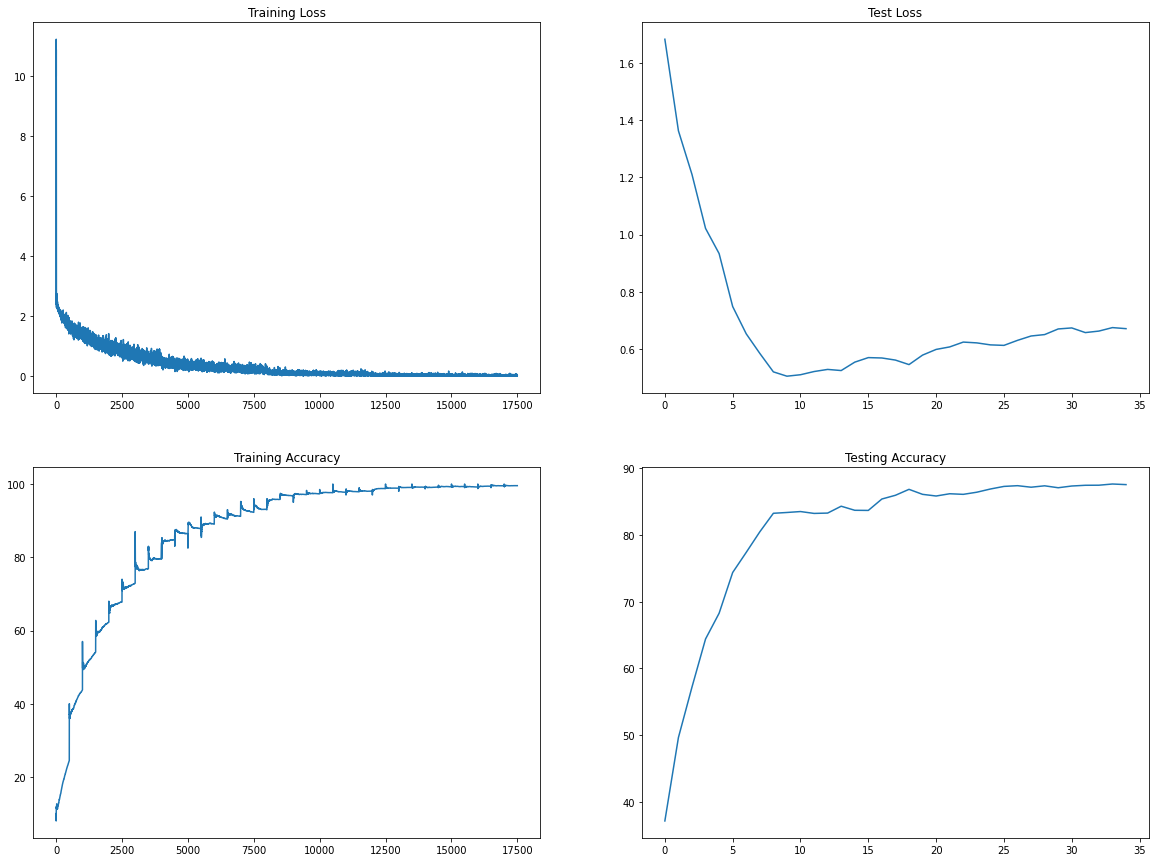

In [7]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

train_loss = [] 
train_accuracy = []
test_loss = []
test_accuracy = []

optimizer = optim.SGD(net.parameters(), lr=0.2, momentum=0.9)
scheduler = StepLR(optimizer, step_size= 8, gamma= 0.5, verbose = True)

for epoch in range(35):  # loop over the dataset multiple times
    misclassified = []
    print(f'Epoch: {epoch+1}')
    train(net, device, trainloader, train_loss, train_accuracy, optimizer)
    test(net, device, testloader, test_loss, test_accuracy, misclassified)
    scheduler.step()

plot_me(train_loss, train_accuracy, test_loss, test_accuracy)


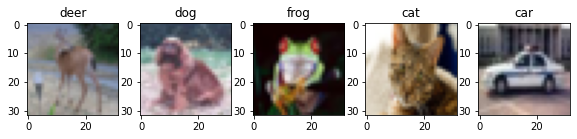

In [8]:
dataiter = iter(testloader)
images, outputs = dataiter.next()
# print images
plot_images(dataiter, classes, total=5)

In [9]:
outputs = net(images.to(device))

In [10]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:    cat  ship  ship plane  frog


In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 87 %


In [12]:
from util.classwise_performance import clswse_perf

clswse_perf(net, testloader, device, batch_size, classes)

Accuracy of plane : 91 %
Accuracy of   car : 95 %
Accuracy of  bird : 80 %
Accuracy of   cat : 74 %
Accuracy of  deer : 86 %
Accuracy of   dog : 80 %
Accuracy of  frog : 88 %
Accuracy of horse : 91 %
Accuracy of  ship : 93 %
Accuracy of truck : 92 %


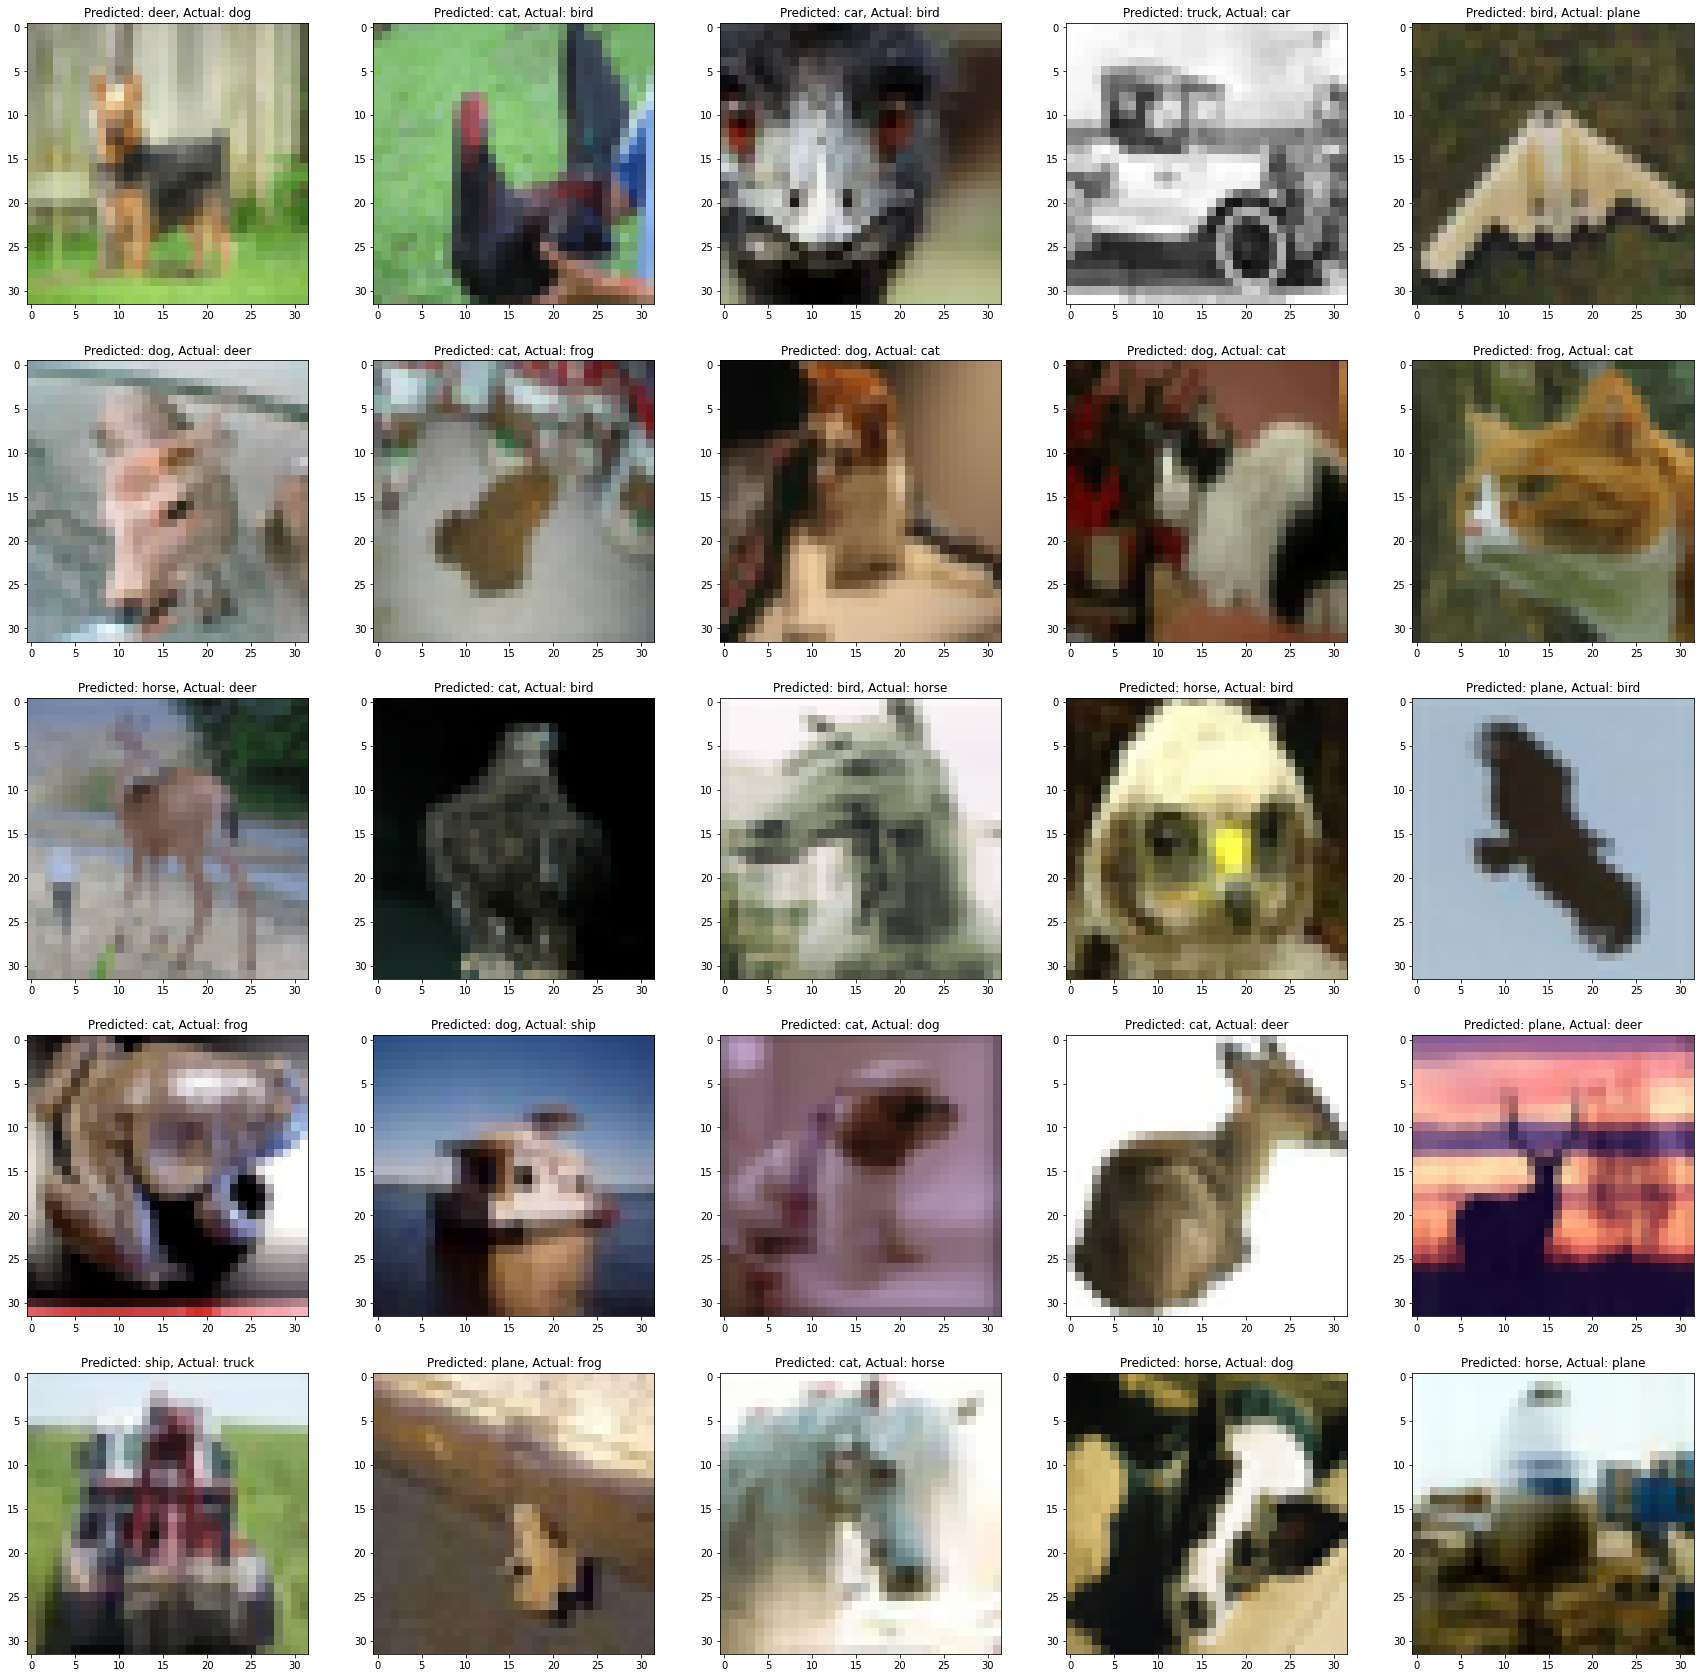

In [13]:
# plotting misclassified images 
dataiter = iter(misclassified)

# print images
plot_images(dataiter, classes, total=25)